# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №4: Линейные модели


###### <hr\>
**Общая информация**

**Срок сдачи:** 6 декабря 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 6 декабря, -4 балла после 06:00 13 декабря, -6 баллов после 06:00 20 декабря

При отправлении ДЗ указывайте фамилию в названии файла<br\>

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Определям, что вам досталось

<center><img src='https://static1.squarespace.com/static/571a6e39b6aa608067028725/t/577988518419c2d62fb5922f/1467582555915/'></center>

Укажите свою фамилию на русском языке в поле ниже.

In [3]:
USER_NAME = u"Кошман".lower()
REGULARIZATIONS = ["L1", "L2"]
ALGORITHM = ["", "Mini Batch"]

print "Имплементируйте обучение логистической регрессии с %s регуляризацией с помощью метода %s Stochastic Gradient Descent (SGD)"\
% (
    REGULARIZATIONS[hash(USER_NAME) % 2],
    ALGORITHM[hash(USER_NAME[::-1]) % 2]
)

Имплементируйте обучение логистической регрессии с L2 регуляризацией с помощью метода Mini Batch Stochastic Gradient Descent (SGD)


#### Замечания
* В SGD градиент расчитывается по одному случайному объекту, т.е. в алгоритме надо
    * Перемешать выборку
    * Посчтитать градиент на одном объекте
    * Сделать шаг спуска
* В Mini Batch SGD - по подвыборке объектов т.е в алгоритме надо
    * Перемешать выборку
    * Разбить на части (примерно) одинакового размера - мини батчи
    * Почитать градиент по мини батчам
    * Сделать шаг спуска
* Сделайте убывающую скорость спуска, например `alpha/n_epoch` или `alpha/n_iter` или `alpha/n_batch` или ...
* Для отладки работы алгоритма, реализуйте возможность сохранения или вывода ошибки модели после очередной итерации/батча/эпохи.
* Правило останова - максимальное количество эпох
    
Эпохой в SGD и MB-SGD называется один проход по **всем** объектам в обучающей выборке (тем или иным способом)

### Примечание для случая L1-регуляризации:

При расчете производной по функции потерь
$$ L(w_0,w_1,\dots) = - \frac{1}{N}\left[\sum_i \log(\sigma(y^{(i)} g(x^{(i)}))\right] + \frac{1}{C}\sum_{j=1}^{m}|w_j| $$
могут возникнуть сомнения по поводу производной части с модулями. 

Вам на выбор предлагаются следующией варианты:
* Считать субградиент $\partial|w_j| = sign(w_j)$ (проще, но с большой вероятностью не приведет к занулению коэффициентов)
* Метод SGD-Clipping из [статьи](https://www.aclweb.org/anthology/P/P09/P09-1054.pdf) - раздел 3.1, страница 479, правая колонка снизу (чуть сложнее, но зато должно занулять)
* Cumulative Penalty из той же [статьи](https://www.aclweb.org/anthology/P/P09/P09-1054.pdf) - раздел 3.2

# Реализация модели

## Вывод правила обновления весов (1 балл)

Выведите правило обновления весов на каждом шаге алгоритма. Иными словами, посчитайте производную (градиент) функции потерь с регуляризацией. Формулы надо оформлять в формате LaTeX.

$$ L(w_0,w_1,\dots) = - \frac{1}{N}\left[\sum_i \log(\sigma(y^{(i)} g(x^{(i)}))\right] + \frac{1}{C}\sum_{j=1}^{m}w_j^{2} = \frac{1}{N}\sum_i \log(1 + e^{-y^{(i)} (\langle w, x^{(i)} \rangle + w_0) }) + \frac{1}{C}\sum_{j=1}^{m}w_j^{2}$$

$$ \frac{\partial L}{\partial w_0} = \frac{1}{N}\sum_i \frac{-y^{(i)}}{1 + e^{y^{(i)} (\langle w, x^{(i)} \rangle + w_0) )}}$$
$$ \frac{\partial L}{\partial w_j} = \frac{1}{N}\sum_i \frac{-y^{(i)}x^{(i)}_j}{1 + e^{y^{(i)} (\langle w, x^{(i)} \rangle + w_0) )}} + \frac{2}{C}w_i, i>0 $$

## Имплементация (5 баллов)

In [64]:
X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
w = np.ones(X.shape[1])
C = 1.

In [105]:
margin.shape

(400,)

In [111]:
dL_dw

array([ 0.1878214 , -0.00659735,  0.05992654])

In [110]:
multiplier.T

array([[ 1.        ,  1.        ,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 5.10023581,  7.8613398 ,  3.03408318, ...,  1.1568567 ,
         0.57961173,  0.5845925 ],
       [-2.69111611, -0.59027583, -3.8758687 , ...,  1.07797884,
         1.85617983,  1.33371091]])

In [97]:
multiplier = y.reshape(-1, 1) * X
margin = np.dot(X, w) * y
denominator = 1 + np.e ** margin
dL_dw = (-1. / X.shape[0]) * (multiplier.T / denominator).sum(axis=1)
dL_dw += (2. / C) * np.concatenate(([0], w[1:]))
w = w - 0.05 * dL_dw
w

array([ 0.64690529,  0.08791119,  0.07557807])

In [222]:
y.shape

(400L,)

In [254]:
((np.dot(np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1), msgd.w) > 0) & (y > 0)).sum(), \
((np.dot(np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1), msgd.w) < 0) & (y < 0)).sum()

(200, 7)

In [79]:
(multiplier.T / denominator).sum(axis=1)

C:\Users\Surface\Anaconda3\envs\ipykernel_py2\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in divide
  """Entry point for launching an IPython kernel.


array([ inf,  inf,  nan])

In [50]:
denominator.shape, multiplier.shape, margin.shape

((400L,), (400L, 3L), (400L,))

In [40]:
dL_dw = (-1. / X.shape[0]) * (multiplier.T / denominator).sum(axis=1)

In [44]:
C = 1

In [48]:
dL_dw += (2. / C) * np.concatenate(([0], w[1:]))

In [49]:
dL_dw

array([ -360.90133972, -2616.69654483,  -222.51560093])

In [9]:
from sklearn.base import BaseEstimator, ClassifierMixin

class MySGDClassifier(BaseEstimator, ClassifierMixin):
    """
    Предполагается, что в выборке всегда 2 класса
    """
    
    def __init__(self, C=1, alpha=0.01, max_epoch=10):
        """
        C - коэф. регуляризации
        alpha - скорость спуска
        max_epoch - максимальное количество эпох
        """
        
        self.C = C
        self.alpha = alpha
        self.max_epoch = max_epoch
    
    def fit(self, X, y=None):
        '''
        Обучение модели
        '''
        X = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        w = np.zeros(X.shape[1])
        for epoch in range(self.max_epoch):
            multiplier = y.reshape(-1, 1) * X
            margin = np.dot(X, w) * y
            denominator = 1 + np.e ** margin
            dL_dw = (-1. / X.shape[0]) * (multiplier.T / denominator).sum(axis=1)
            dL_dw += (2. / self.C) * np.concatenate(([0], w[1:]))
            w += -self.alpha * dL_dw
        self.w = w
        return self
    
    def partial_fit(self, X, y=None):
        '''
        По желанию - метод дообучения модели на новых данных
        '''
    
        return self
        
    def predict(self, X):
        '''
        Возвращение метки класса
        '''
        ready_x = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        return np.where(np.dot(ready_x, self.w) > 0, 1, -1)
    
    @staticmethod
    def sigmoid(x):
        return 1. / (1 + np.e ** (-x))
    
    def predict_proba(self, X):
        '''
        Возвращение вероятности каждого из классов
        '''
        ready_x = np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1)
        
        return self.sigmoid(np.dot(ready_x, self.w))

## Проверка на синтетических данных (1 балл)

Запустите ваш алгоритм на синтетических данных. 
Выведите полученные веса и нарисуйте разделяющую границу между классами.

In [114]:
msgd = MySGDClassifier(max_epoch=1001, C=2.)
msgd.fit(X, y)
msgd.w

array([-0.69545843, -0.04725919,  0.29234739, -0.07286841])

In [450]:
1. / (1 + np.e ** (-1))

0.7310585786300049

In [453]:
msgd.predict_proba(X).max()

0.8419137385122839

In [451]:
msgd.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,
        1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,
        1,  1,  1,  1,  1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
       -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1, -1, -1, -1,  1,  1, -1,  1,  1,  1, -1,  1, -1, -1,
       -1, -1, -1,  1, -1,  1,  1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [454]:
(msgd.predict(X) == y).sum()

339

In [435]:
np.dot(np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1), msgd.w)

array([  3.87971429e-01,   7.40466068e-01,   1.11748648e-01,
         2.55379371e-01,   3.42073373e-01,   5.59740088e-01,
         3.05798239e-01,   3.40565627e-01,   2.58473789e-01,
         9.67191670e-02,   3.28287201e-01,   1.33558383e-01,
         2.54959058e-02,   2.24873171e-01,   5.98502102e-01,
         3.42144261e-01,  -1.62276593e-01,   2.84304758e-01,
         5.36670160e-01,   1.90429802e-01,  -5.28715628e-02,
         6.12688930e-01,   1.59795360e-01,   3.86798206e-01,
         1.77025070e-01,   3.16905123e-01,   9.42278016e-03,
         3.47593156e-01,   3.24545707e-01,   1.71842214e-01,
         1.71507048e-01,  -1.08826955e-01,   1.84809991e-01,
         3.13376481e-01,   2.48783379e-01,   3.06456403e-01,
         4.08811857e-02,   1.33289252e-01,   1.22007183e-01,
         2.64955845e-01,   4.14023192e-01,  -3.74692117e-02,
         6.83715231e-01,   2.55475593e-01,   4.47554305e-01,
         4.98732280e-01,   4.64686757e-01,   4.13815314e-01,
         6.23443569e-01,

In [240]:
x_x = 4
y_y = -msgd.w[1] * x_x - msgd.w[0]
y_y

-4.1094286229740176

In [235]:
np.dot(msgd.w[:3], [1, -4, -4])

-5.2111158903711896

In [231]:
np.linspace(-4, 8)

array([-4.        , -3.75510204, -3.51020408, -3.26530612, -3.02040816,
       -2.7755102 , -2.53061224, -2.28571429, -2.04081633, -1.79591837,
       -1.55102041, -1.30612245, -1.06122449, -0.81632653, -0.57142857,
       -0.32653061, -0.08163265,  0.16326531,  0.40816327,  0.65306122,
        0.89795918,  1.14285714,  1.3877551 ,  1.63265306,  1.87755102,
        2.12244898,  2.36734694,  2.6122449 ,  2.85714286,  3.10204082,
        3.34693878,  3.59183673,  3.83673469,  4.08163265,  4.32653061,
        4.57142857,  4.81632653,  5.06122449,  5.30612245,  5.55102041,
        5.79591837,  6.04081633,  6.28571429,  6.53061224,  6.7755102 ,
        7.02040816,  7.26530612,  7.51020408,  7.75510204,  8.        ])

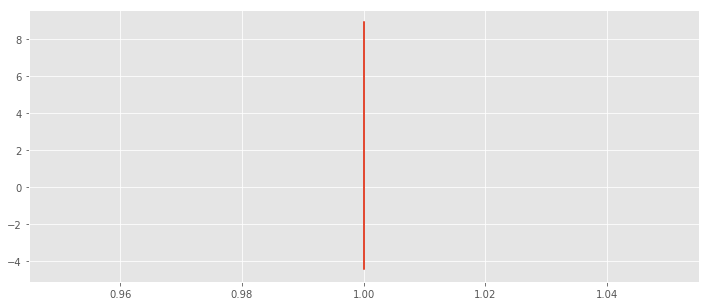

In [230]:
plt.plot(X[:, :1], np.dot(np.concatenate((np.ones(X.shape[0]).reshape(-1, 1), X), axis=1), msgd.w))

In [7]:
np.random.seed(0)

C1 = np.array([[0., -0.8], [1.5, 0.8]])
C2 = np.array([[1., -0.7], [2., 0.7]])
gauss1 = np.dot(np.random.randn(200, 2) + np.array([5, 3]), C1)
gauss2 = np.dot(np.random.randn(200, 2) + np.array([1.5, 0]), C2)

X = np.vstack([gauss1, gauss2])
y = np.r_[np.ones(200), -np.ones(200)]

In [479]:
msgd.w / msgd.w[2]

array([ 9.41602213, -2.79409653,  1.        ])

In [2]:
from ipywidgets import interact, IntSlider, fixed, FloatSlider

0.66
[-0.004251    0.09429502 -0.01102914]


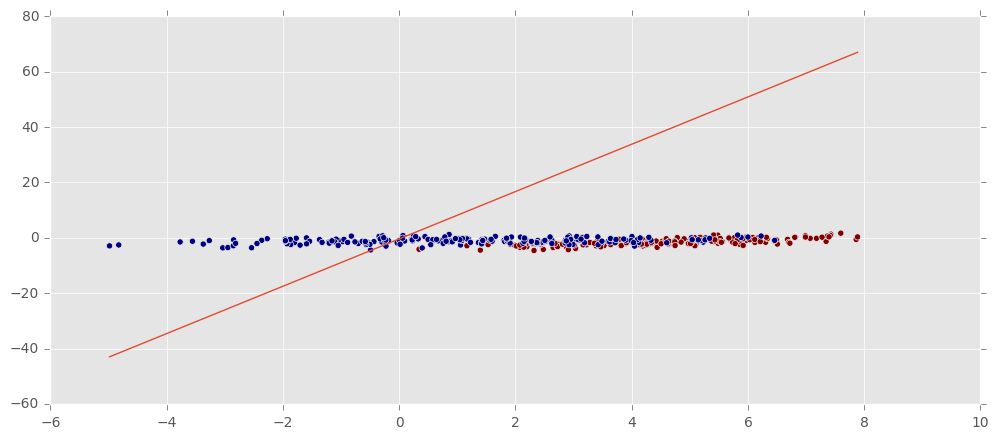

In [63]:
msgd = MySGDClassifier(max_epoch=3, C=1., alpha=0.05)
plt.scatter(X[:,0], X[:,1], c=y)
msgd.fit(X, y)
space = np.linspace(X[:, 0].min(), X[:, 0].max())
space_y = -(msgd.w[0] + msgd.w[1] * space) / msgd.w[2]
plt.plot(space, space_y)
print((msgd.predict(X) == y).sum() / y.shape[0])
print(msgd.w)

## Анализ сходимости (2 балла)

Для следующих заданий используйте датасет ниже

In [3]:
from sklearn.datasets import make_classification

In [85]:
X, y = make_classification(n_samples=100000, n_features=10, 
                           n_informative=4, n_redundant=0, 
                           random_state=123, class_sep=1.0,
                           n_clusters_per_class=1)

Покажите сходимость вашего метода: изобразите графики зависимости значения функции потерь (по всей выборке) после очередной итерации/батча/эпохи (выбрать одно) для разных `alpha`.

In [ ]:
## Your Code Here

In [456]:
msgd.w

array([-1.1985637 ,  0.35566003, -0.12728981])

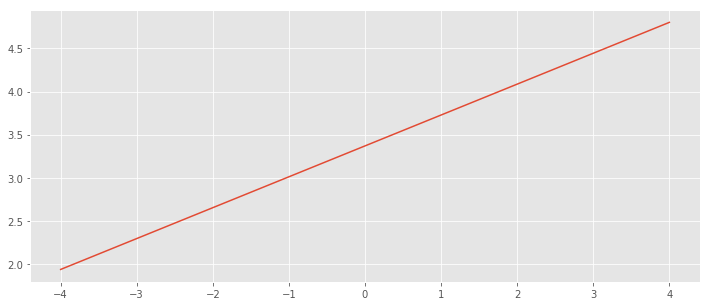

In [467]:
space = np.linspace(-4, 4)
space_y = -(msgd.w[0] + msgd.w[2] * space) / msgd.w[1]
plt.plot(space, space_y)

## Эффект регуляризации (2 балла)

Изобразите значения коэффициентов модели для каждого С из `np.logspace(3, -3, 10)` (желательно на одном и том же графике)

In [455]:
np.logspace(3, -3, 10)

array([  1.00000000e+03,   2.15443469e+02,   4.64158883e+01,
         1.00000000e+01,   2.15443469e+00,   4.64158883e-01,
         1.00000000e-01,   2.15443469e-02,   4.64158883e-03,
         1.00000000e-03])

In [ ]:
## Your Code Here


# Боевое применение

## О hearthstone

[Hearthstone](http://eu.battle.net/hearthstone/ru/) - карточная он-лайн игра по мотивам вселенной Warcraft.

Каждый игрок играет за персонажа определенного класса и собирает колоду карт которую может разыгрывать во время игры. Для дальнейших деталей обратитесь к [wiki](https://ru.wikipedia.org/wiki/Hearthstone), посмотрите youtube или поиграйте сами (но не долго =) ).

Теми или иными способами игрок может отнимать жизни у своего оппонента, таким образом цель раунда - побить другого игрока.

<center><img src='http://ps3hits.ru/wp-content/uploads/2015/08/hearthstone-game-sshot-1.jpg'></center>

## Постановка задачи

В рамках конференции [AAIA 17](https://fedcsis.org/2017/aaia) было запущено [соревнование](https://knowledgepit.fedcsis.org/contest/view.php?id=120) по предсказанию исхода раунда в heartstone. 

Используя признаки, которые описывают текущее состояние раунда необходимо предсказать **вероятность** победы игрока в этом раунде.

Качество модели измеряется с помощью **ROC-AUC**

## Данные

Обучающую выборку и тестовую выборку с ответами можно скачать [отсюда](https://cloud.mail.ru/public/BEon/4Rrdqqvng)

Данные содержат набор информации о раунде в некоторый момент времени: жизни игрока и оппонента, номер хода, карты на столе, карты в руке игрока, количество карт в руке оппонента и тп.<br/>
По игроку №1 (далее просто **игрок**) помимо всего прочего известен набор карт "в руке".</br>
По игроку №2 (далее просто **оппонент**) эта информация отсутствует.</br>


В данных для обучению содержится 2 млн. игр, разбитых на 4 файла. Названия признаков говорят сами за себя.
Целевой признак - `decision` (1 - победил игрок, 0 - победил оппонент).

## Работа с простыми табличными данными (1 балл)

По соображениям сокращения времени вычислений, проделаем основные шаги по одной части данных.

Если все данные не будут помещаться вам с оперативную память, то можете использовать один из 4х файлов для обучения

In [ ]:
# Загрузка данных целиком
# df_list = []
# for chunk in range(1,5):
#     filepath = './trainingData_tabular_chunk%d.csv' % chunk
#     df_list.append(pd.read_csv(filepath, sep=','))
# df_data = pd.concat(df_list)

# Загрузка одной части данных
# filepath = './trainingData_tabular_chunk1.csv'
# df_data = pd.read_csv(filepath, sep=',')

In [ ]:
df_data.shape

In [ ]:
# для удобства
df_data.columns = df_data.columns.str.replace('.', '_')
df_data = df_data.set_index('gamestate_id')

In [ ]:
df_data.head().T

In [ ]:
# Распределение классов
df_data.decision.mean()

# Примерно поровну

#### Задание

* Определите количество уникальных карт героя у игрока и оппонента.
* Преобразуйте категориальные переменные с помощью one-hot кодирования, добавьте к датасету и удалите прежние столбцы


In [ ]:
## Youd Code Here

## Обучение модели (1 балл)

#### Задание

* Получите матрицу объект признак `X` и вектор целевого признака `y`
* Создайте Pipeline из `StandartScaller` и вашей модели
* Обучите модель (подбирать гиперпараметры можно без фанатизма)

In [ ]:
## Youd Code Here

## Применение модели (2 балла)
#### Задание
* Загрузите тестовые данные
* Подготовте их к подаче на вход в алгоритм
* Примените модель оцените качество с помощью меры ROC-AUC


In [ ]:
## Youd Code Here